In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

**Step 1: Overview of Each Dataset**

Overview of datasets

In [10]:
path_items = '../data/processed/df_items_clean.parquet'
path_genres = '../data/processed/df_genres_dummies.parquet'
path_games = '../data/processed/df_games_clean.parquet'
path_reviews = '../data/processed/df_reviews_clean.parquet'


df_items = pd.read_parquet(path_items)
df_genres = pd.read_parquet(path_genres)
df_games = pd.read_parquet(path_games)
df_reviews = pd.read_parquet(path_reviews)

# Convert 'game_id' to string in all DataFrames to ensure matching data types
df_items['game_id'] = df_items['game_id'].astype(str)
df_genres['game_id'] = df_genres['game_id'].astype(str)
df_games['game_id'] = df_games['game_id'].astype(str)
df_reviews['game_id'] = df_reviews['game_id'].astype(str)


Displaying First Few Rows

In [11]:
df_items.head()

,user_id,items_count,game_id,item_name,playtime_forever
0,76561197970982479,277,10,Counter-Strike,6.0
0,76561197970982479,277,20,Team Fortress Classic,0.0
0,76561197970982479,277,30,Day of Defeat,7.0
0,76561197970982479,277,40,Deathmatch Classic,0.0
0,76561197970982479,277,50,Half-Life: Opposing Force,0.0


In [12]:
df_genres.head()

,game_id,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,761140,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,643980,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,670290,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,767400,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,772540,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
df_games.head()

,game_id,developer,app_name,release_year
0,761140,Kotoshiro,Lost Summoner Kitty,2018
1,643980,Secret Level SRL,Ironbound,2018
2,670290,Poolians.com,Real Pool 3D - Poolians,2017
3,767400,彼岸领域,弹炸人2222,2017
4,772540,Trickjump Games Ltd,Battle Royale Trainer,2018


In [14]:
df_reviews.head()

,user_id,game_id,recommend,sentiment_analysis
0,76561197970982479,1250,True,2
0,76561197970982479,22200,True,2
0,76561197970982479,43110,True,2
1,js41637,251610,True,2
1,js41637,227300,True,0


**Dataset Information:**

The initial overview of these datasets provides a clear understanding of their structure and content, essential for guiding our EDA. We have a mix of user-specific data (reviews and items owned), as well as game-specific information (game details and genres). This may aid in developing a recommendation system by using both user and game attributes.

In [15]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5153209 entries, 0 to 88308
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   game_id           object 
 3   item_name         object 
 4   playtime_forever  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 235.9+ MB


In [16]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28592 entries, 0 to 28591
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   game_id                28592 non-null  object
 1   Accounting             28592 non-null  int64 
 2   Action                 28592 non-null  int64 
 3   Adventure              28592 non-null  int64 
 4   Animation & Modeling   28592 non-null  int64 
 5   Audio Production       28592 non-null  int64 
 6   Casual                 28592 non-null  int64 
 7   Design & Illustration  28592 non-null  int64 
 8   Early Access           28592 non-null  int64 
 9   Education              28592 non-null  int64 
 10  Free to Play           28592 non-null  int64 
 11  Indie                  28592 non-null  int64 
 12  Massively Multiplayer  28592 non-null  int64 
 13  Photo Editing          28592 non-null  int64 
 14  RPG                    28592 non-null  int64 
 15  Racing             

In [17]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28592 entries, 0 to 28591
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   game_id       28592 non-null  object
 1   developer     28592 non-null  object
 2   app_name      28592 non-null  object
 3   release_year  28592 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 781.9+ KB


In [18]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59305 entries, 0 to 25798
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59305 non-null  object
 1   game_id             59305 non-null  object
 2   recommend           59305 non-null  bool  
 3   sentiment_analysis  59305 non-null  int64 
dtypes: bool(1), int64(1), object(2)
memory usage: 1.9+ MB


**Descriptive Statistics**

Insights:
- The Items Dataset shows a vast diversity in user game collections and playtime, which can be key in understanding user engagement and preferences.
- The Genres Dataset offers a clear categorization of games that can be instrumental in building an item-item recommendation system based on genre similarities.
- The Games Dataset provides essential historical and identification data about the games.
- The Reviews Dataset gives an insight into user sentiment, crucial for understanding user preferences and for a user-item recommendation system.

In [19]:
df_items.describe()

,items_count,playtime_forever
count,5.153209e+06,5.153209e+06
mean,3.147229e+02,9.914951e+02
std,6.933596e+02,5.418204e+03
min,1.000000e+00,0.000000e+00
25%,7.200000e+01,0.000000e+00
50%,1.380000e+02,3.400000e+01
75%,2.760000e+02,3.550000e+02
max,7.762000e+03,6.427730e+05


In [20]:
df_genres.describe()

,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
count,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,...,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000,28592.000000
mean,0.000245,0.411444,0.319250,0.006400,0.003428,0.308968,0.016088,0.050084,0.010772,0.076805,...,0.002728,0.201000,0.039067,0.245698,0.003917,0.045467,0.255421,0.018257,0.004197,0.009583
std,0.015645,0.492104,0.466194,0.079747,0.058446,0.462076,0.125818,0.218122,0.103231,0.266286,...,0.052160,0.400755,0.193757,0.430508,0.062466,0.208330,0.436105,0.133881,0.064649,0.097425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df_games.describe()

,release_year
count,28592.000000
mean,2014.849608
std,3.271137
min,1983.000000
25%,2014.000000
50%,2016.000000
75%,2017.000000
max,2021.000000


In [22]:
df_reviews.describe()

,sentiment_analysis
count,59305.000000
mean,1.350476
std,0.810863
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


**Step 2. Univariate Analysis**


Items Dataset
- Items Count The distribution being skewed to the left indicates that a majority of users own a relatively small number of games. This skewness is crucial for understanding user behavior, as it suggests that most users might prefer a limited selection of games.
- Playtime Forever: A more pronounced skewness to the left in playtime suggests that while there are users with very high playtime, the majority of users have lower playtime. This could indicate casual gaming habits among most users or a focus on a few select games.

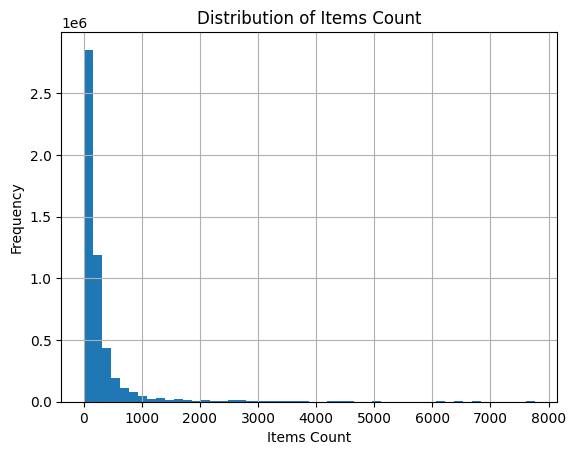

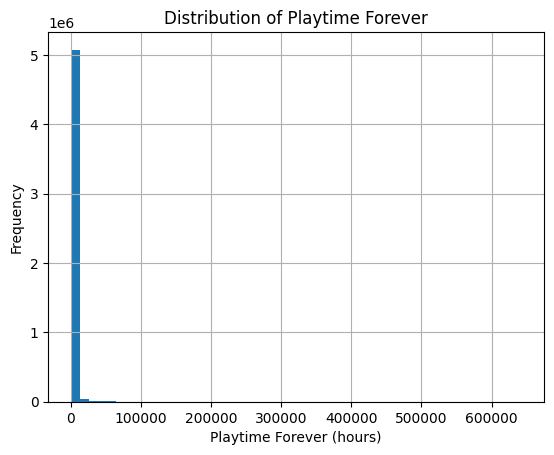

In [23]:
df_items['items_count'].hist(bins=50)
plt.title('Distribution of Items Count')
plt.xlabel('Items Count')
plt.ylabel('Frequency')
plt.show()

df_items['playtime_forever'].hist(bins=50)
plt.title('Distribution of Playtime Forever')
plt.xlabel('Playtime Forever (hours)')
plt.ylabel('Frequency')
plt.show()

Genres Dataset
- Genre Frequency: The dominance of genres like Indie, Action, Adventure, Casual, and Strategy provides valuable insight into user preferences. It suggests these genres should be given more emphasis in recommendation systems, especially for reaching a broader audience. The popularity of Indie games also points to a potentially diverse range of user interests beyond mainstream titles.

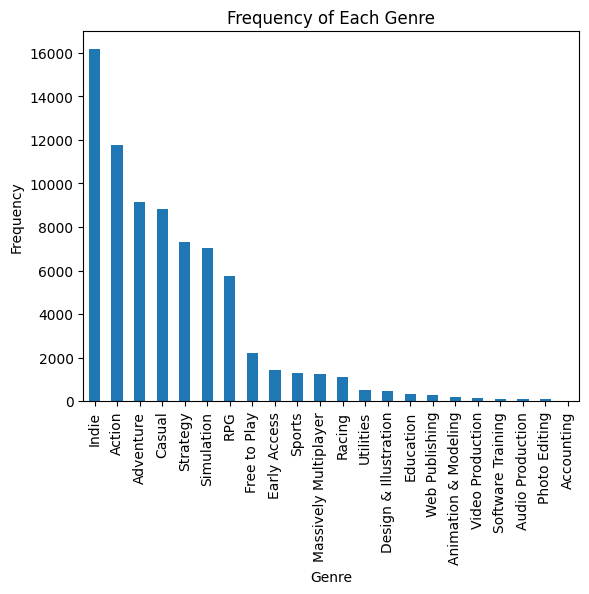

In [24]:
genre_columns = df_genres.columns[1:]  
genre_counts = df_genres[genre_columns].sum().sort_values(ascending=False)

genre_counts.plot(kind='bar')
plt.title('Frequency of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

Games Dataset
- Release Year: A concentration of games around the year 2016 might reflect a peak in game releases or data collection during this period. This could influence the recommendation system, as more recent games might be more relevant to current users.

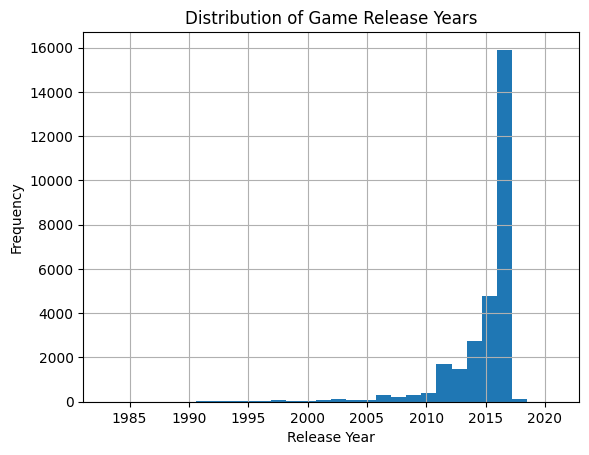

In [25]:
df_games['release_year'].hist(bins=30)
plt.title('Distribution of Game Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

Reviews Dataset
- Sentiment Analysis: The predominance of a positive sentiment (score = 2) suggests that users generally have favorable opinions about the games. The equal frequency of scores 1 and 0 could imply a significant portion of mixed or negative reviews, which should be considered when making recommendations.

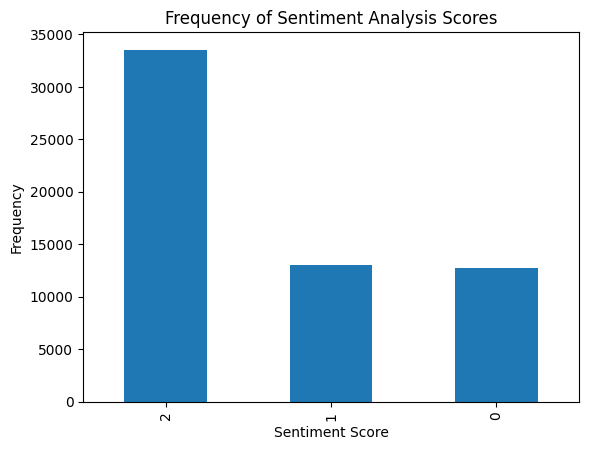

In [26]:
df_reviews['sentiment_analysis'].value_counts().plot(kind='bar')
plt.title('Frequency of Sentiment Analysis Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

*Overall Conclusions*
- The sentiment analysis distribution is key to understanding user satisfaction and preferences. The presence of significant negative and neutral sentiments suggests the need for a nuanced approach in the recommendation system, where user satisfaction and game quality are considered.
- Positive sentiment being the most common is encouraging, indicating that many users are finding games they enjoy, which can be leveraged in promoting similar or related games.
- The distribution of neutral and negative sentiments highlights the importance of carefully curating game recommendations to enhance user experience and avoid suggesting games that might lead to dissatisfaction.

**3. Bivariate and Multivariate Analysis** 

Relationship between Genres and User Preference
- To explore how different game genres correlate with user preferences, as indicated by sentiment analysis scores.

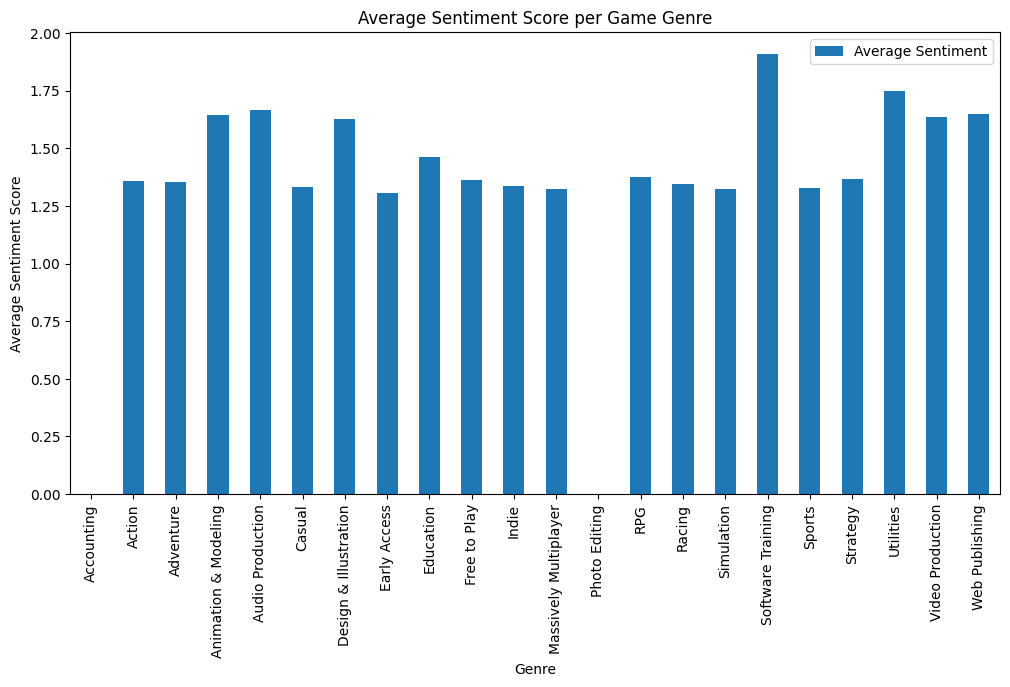

In [27]:

df_genre_reviews = df_genres.merge(df_reviews, on='game_id')

genre_columns = df_genres.columns[1:]  
avg_sentiment_per_genre = {genre: df_genre_reviews[df_genre_reviews[genre] == 1]['sentiment_analysis'].mean() for genre in genre_columns}

avg_sentiment_df = pd.DataFrame(list(avg_sentiment_per_genre.items()), columns=['Genre', 'Average Sentiment'])

avg_sentiment_df.plot(x='Genre', y='Average Sentiment', kind='bar', figsize=(12, 6))
plt.title('Average Sentiment Score per Game Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sentiment Score')
plt.show()



Playtime and Game Popularity:
- To investigate if there is a correlation between the popularity of a game (measured by the number of reviews) and its release year.

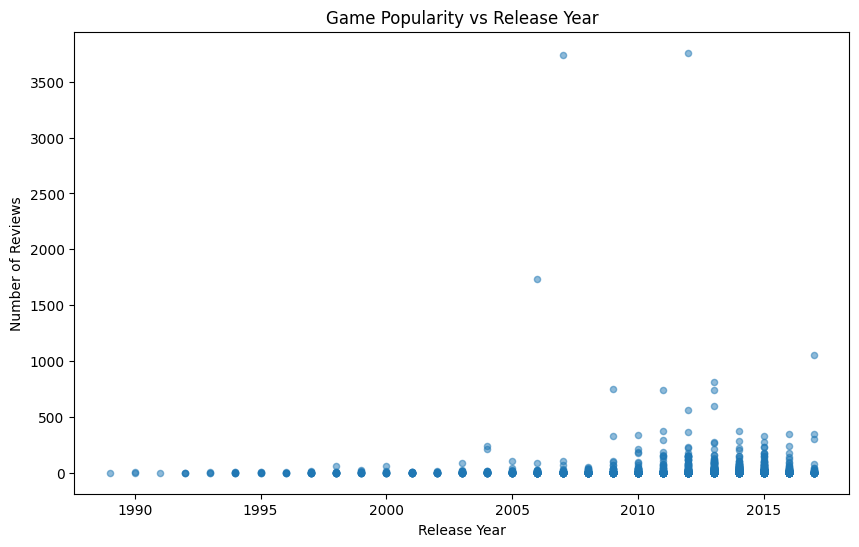

In [28]:
game_popularity = df_reviews['game_id'].value_counts().reset_index()
game_popularity.columns = ['game_id', 'Number of Reviews']

df_games_popularity = df_games.merge(game_popularity, on='game_id')

df_games_popularity.plot.scatter(x='release_year', y='Number of Reviews', alpha=0.5, figsize=(10, 6))
plt.title('Game Popularity vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Reviews')
plt.show()

Release Year and Sentiment Analysis
- To explore if there is a correlation between the year a game was released and the sentiment analysis score of user reviews.

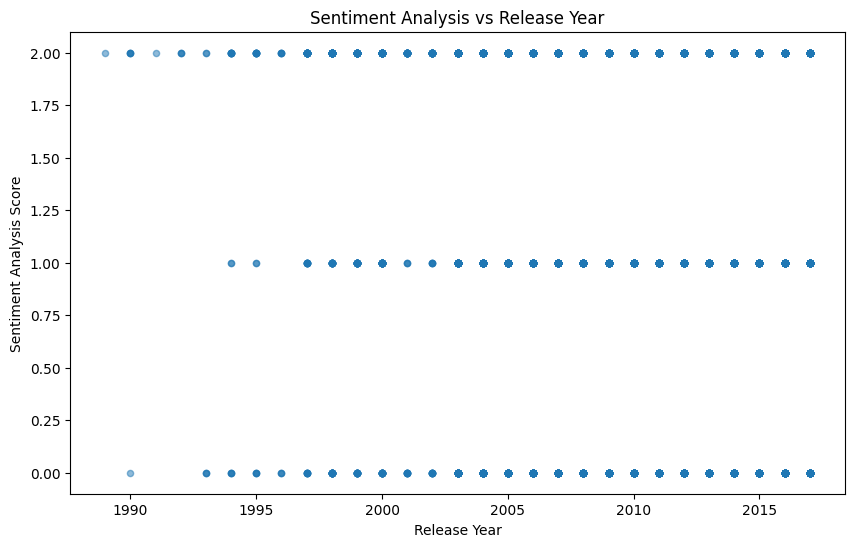

In [29]:

df_games_sentiment = df_games.merge(df_reviews, on='game_id')


df_games_sentiment.plot.scatter(x='release_year', y='sentiment_analysis', alpha=0.5, figsize=(10, 6))
plt.title('Sentiment Analysis vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Sentiment Analysis Score')
plt.show()


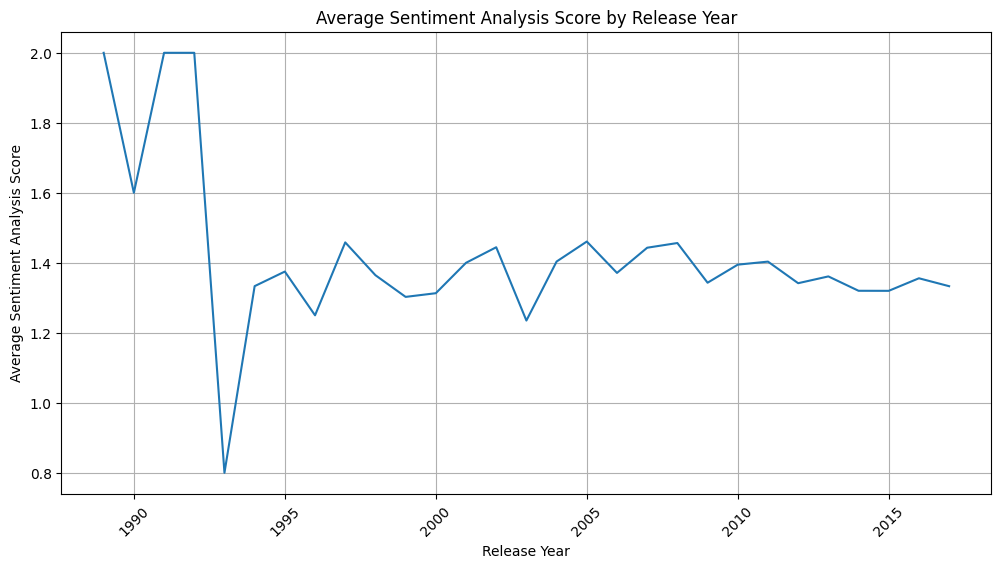

In [30]:

df_games_sentiment = df_games.merge(df_reviews, on='game_id')

average_sentiment_by_year = df_games_sentiment.groupby('release_year')['sentiment_analysis'].mean()

plt.figure(figsize=(12, 6))
average_sentiment_by_year.plot(kind='line')
plt.title('Average Sentiment Analysis Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Sentiment Analysis Score')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()


**Conclusions**
1. Relationship between Genres and User Preferences:
- 'Software Training' emerged as the most popular genre, while 'Photo Editing' had the lowest sentiment scores. This indicates a clear preference among users for certain types of games.
- The model may prioritize genres like 'Software Training' in its recommendations. Genres with lower sentiment scores might be included with caution or tailored to specific user profiles.
2. Playtime and Game Popularity:
- A higher concentration of popular games was observed between 2010 and 2015. Additionally, certain outlier years like 2006, 2008, 2009, and 2013 featured prominently, possibly indicating the release of standout titles in those years.
- The recommendation system could focus on titles from the 2010-2015 period, while also considering standout games from the outlier years. This suggests a potential user preference for games from these specific timeframes.
3. Release Year and Sentiment Analysis:
- A high concentration of data post-2010 was noted, implying that more recent games tend to have higher sentiment scores.
- Incorporating the `release year` as a feature could be beneficial, potentially giving more weight to newer games, which seem to align better with current user preferences.
4. Average Sentiment Analysis Score by Year:
- Significant fluctuations in sentiment scores were noted before 1995, while post-1995 years showed more stability, with scores fluctuating moderately between 1.2 and 1.5.
- This insight suggests a more consistent gaming market in recent years. The model could use average sentiment scores as a reliable feature, especially for games released after 1995.

**4.Feature Engineering & Creating the model**
- Only a sample of the data was used due to limitations on the hardware used

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


df_merged = df_games.merge(df_genres, on='game_id', how='left')

features = ['release_year'] + list(df_genres.columns[1:])  

# Normalize 'release_year'
scaler = StandardScaler()
df_merged['release_year'] = scaler.fit_transform(df_merged[['release_year']])


df_final = df_merged[['game_id'] + features]
df_final= df_final.merge(df_games[['game_id', 'app_name']], on='game_id', how='left')


In [32]:
# Sample a subset of your data, for example, 50%
df_sampled = df_final.sample(frac=0.5, random_state=42)

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(df_sampled[features].fillna(0))
similarity_matrix = np.nan_to_num(similarity_matrix)


In [33]:
def recomend_game_sampled(game_id, top_n=5):
    sampled_game_ids = df_sampled['game_id'].unique()
    if game_id not in sampled_game_ids:
        return f"No recommendations found: {game_id} is not in the sampled data."

    game_idx = df_sampled.index[df_sampled['game_id'] == game_id].tolist()
    
    if not game_idx:
        return f"No recommendations found: {game_id} is not in the sampled data."
    
    game_idx = game_idx[0]

    similarity_scores = list(enumerate(similarity_matrix[game_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    similar_games_indices = [i for i, score in similarity_scores[1:top_n+1]]
    similar_game_names = df_sampled['app_name'].iloc[similar_games_indices].tolist()

    recommendation_message = f"Recommended games based on game ID {game_id} - {df_sampled['app_name'].iloc[game_idx]}:"
    
    return [recommendation_message] + similar_game_names


Test:

In [35]:
test_game_id = "754190"
recommendations = recomend_game_sampled(test_game_id, top_n=5)

print("Recommendations for Game ID", test_game_id)
for rec in recommendations:
    print(rec)


Recommendations for Game ID 754190
Recommended games based on game ID 754190 - Fantasy Grounds - Of Drow Origin (5E):
Fantasy Grounds - Gaming #9: Monstrous Humanoids & Outsiders (Token Pack)
Fantasy Grounds - Savage Worlds Necessary Evil Online Gaming (Token Pack)
Fantasy Grounds - Pathfinder RPG - Kingmaker AP 5: War of the River Kings
Fantasy Grounds - Feats of Legend: 20 Orc Feats (PFRPG)
Rayless


In this notebook, we have implemented a game recommendation system that assists users in discovering new games based on their preferences and interests. This recommendation system utilizes a technique called cosine similarity to measure the similarity between games in our dataset.

Cosine similarity is a mathematical measure used to determine how alike two games are by comparing their respective features. In our case, we selected features such as the `release year` and `genre` information to represent each game. By comparing these features, we can identify games that share common characteristics and are, therefore, more likely to be appealing to similar audiences.

This recommendation system may be improved by adding more features and suing a better machine with good procesing power 

In summary, this recommendation system leverages cosine similarity to provide personalized game suggestions. It compares games based on their features, allowing users to discover new gaming experiences tailored to them. 